## Analysis of Vehicle Sales Data

In this notebook we will perform a basic analysis of vehicle sales data. The dataset contains records of cars sold, with various attributes such as price, model year, condition, and more. Our goal is to uncover insights into the factors that influence car prices using pandas, altair, streamlit, pyplot, and seaborn to visualize the distribution of key variables to identify patterns and outliers.

In [1]:
#import libraries
import pandas as pd
import altair as alt
import streamlit as st
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import file and inspect basic data
path = 'https://raw.githubusercontent.com/timofey2001/TripleTen-SDT-project/main/vehicles_us.csv'
cars = pd.read_csv(path)
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [3]:
#preview the dataframe
cars.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [4]:
#check for missing values
missing_values = cars.isnull().sum()
missing_values

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [5]:
#fill missing values with 0, assuming missing means the vehicle does not have 4WD. We will assume this purely for simplicity
cars['is_4wd'].fillna(0, inplace=True)
cars['is_4wd'] = cars['is_4wd'].astype(bool)

#fill missing paint colors with unknown
cars['paint_color'].fillna('Unknown', inplace=True)

average_cylinders = cars.groupby(['model_year', 'model'])['cylinders'].transform('mean')
cars['cylinders'].fillna(average_cylinders, inplace=True)

cars.sample(15)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
28267,2700,2007.0,gmc acadia,like new,6.0,gas,181519.0,automatic,SUV,white,True,2019-01-06,29
12465,14495,2018.0,ford focus,excellent,4.0,gas,42518.0,automatic,sedan,white,False,2018-09-18,26
14320,12995,2015.0,chevrolet malibu,excellent,4.0,gas,106000.0,automatic,sedan,white,False,2018-10-01,46
40953,2500,2001.0,ford f-250,fair,10.0,gas,134000.0,automatic,pickup,red,True,2018-07-13,46
218,500,2004.0,toyota corolla,like new,4.0,gas,NaN,automatic,sedan,blue,False,2018-09-17,24
50875,3995,2012.0,ford fusion,good,6.0,gas,124003.0,automatic,sedan,red,False,2019-03-29,14
41609,37000,2018.0,chevrolet silverado 1500 crew,good,8.0,gas,30465.0,other,pickup,white,True,2018-11-11,24
46452,29995,2017.0,toyota tacoma,excellent,6.0,gas,37497.0,automatic,pickup,grey,True,2018-06-27,59
820,17500,2014.0,toyota tacoma,excellent,6.0,gas,99000.0,automatic,truck,grey,False,2018-12-06,80
4735,19500,2010.0,cadillac escalade,like new,8.0,gas,99000.0,automatic,SUV,Unknown,True,2019-03-26,101


Now lets create a graph that helps us visualize the distributions of columns using a histplot and the subplot method in pyplot

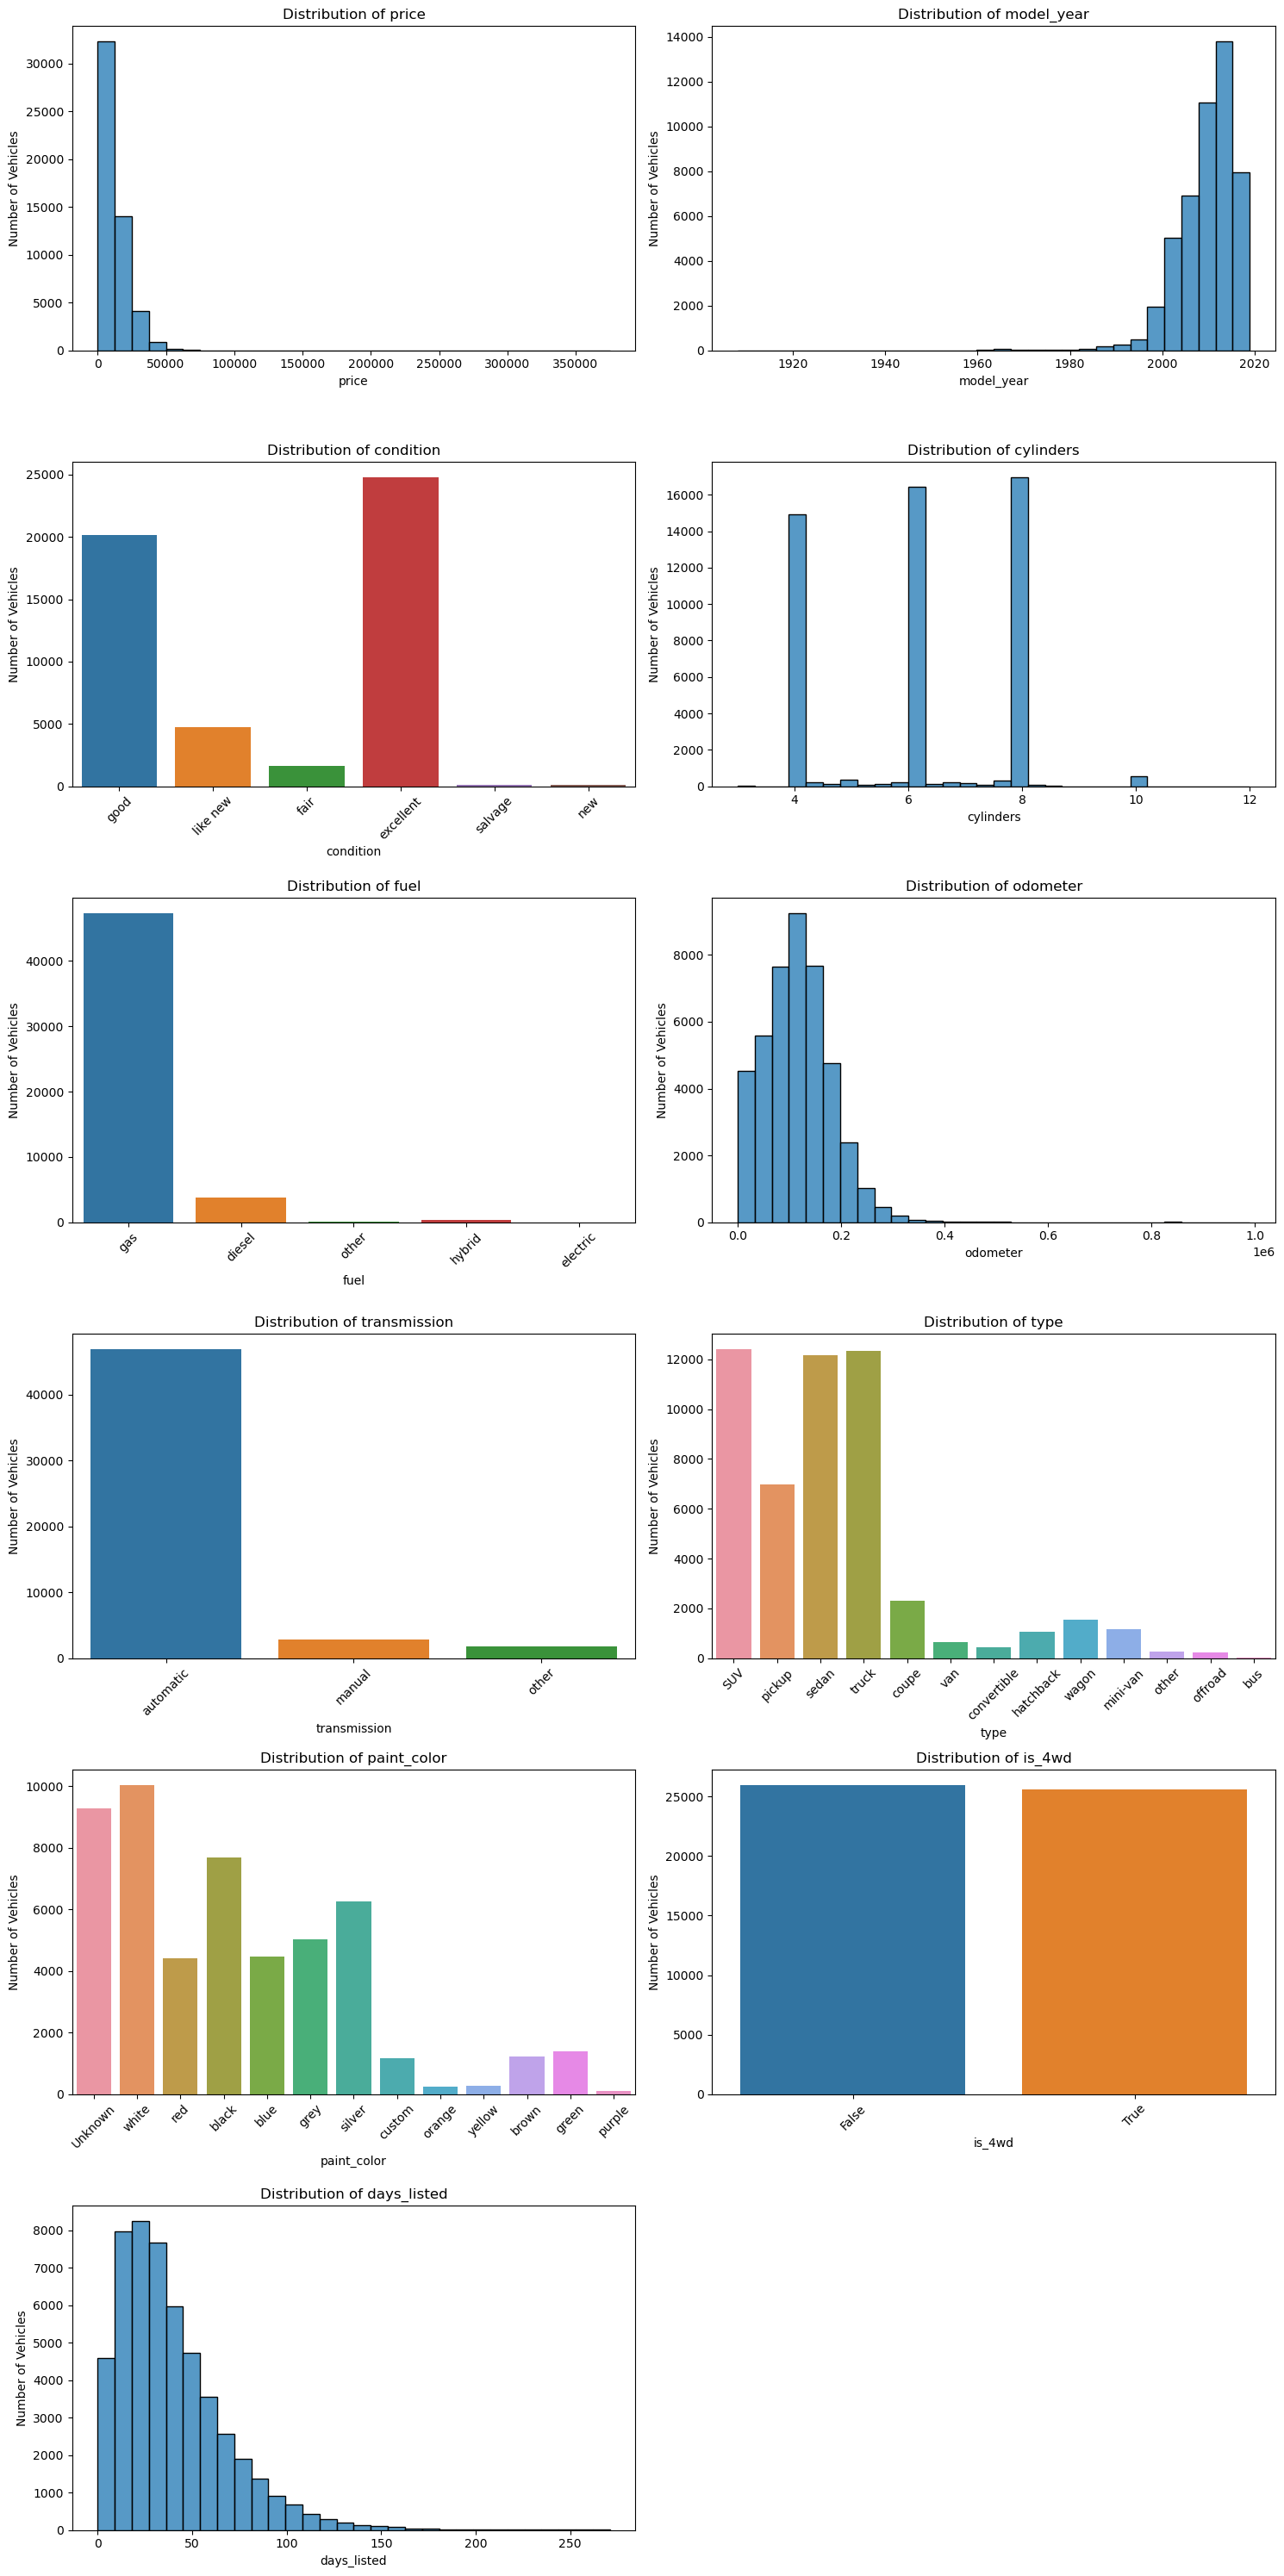

In [12]:
all_columns = [col for col in cars.columns if col not in ['date_posted', 'model']]
num_rows = (len(all_columns) + 1) // 2
plt.figure(figsize=(15, num_rows * 5))
for i, col in enumerate(all_columns, 1):
    ax = plt.subplot(num_rows, 2, i)
    if cars[col].dtype in ['int64', 'float64']:
        sns.histplot(cars[col].dropna(), kde=False, bins=30, ax=ax)
        ax.set_ylabel('Number of Vehicles')
    else:
        sns.countplot(x=col, data=cars, ax=ax)
    ax.set_title(f'Distribution of {col}')
    if col in cars.select_dtypes(include=['object', 'bool']).columns:
        ax.set_ylabel('Number of Vehicles')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show()

Now lets do some more advanced comparisons, First lets graph the relationship between condition and price. We will use a box plot.

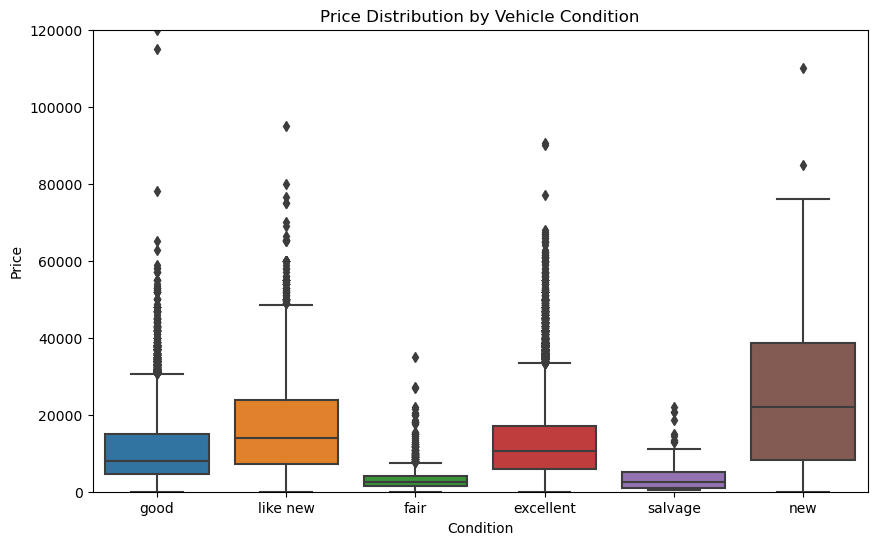

In [7]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='condition', y='price', data=cars)
ax.set_title('Price Distribution by Vehicle Condition')
ax.set_xlabel('Condition')
ax.set_ylabel('Price')
ax.set_ylim(0, 120000)
plt.show()

Given this graph, we can conclude that vehicles in the new condition tend to sell for higher prices and have fewer outliers. The "good" and "like new" condition vehicles have alot of outliers sugessting stats that are not ploted like rarity and luxury status.

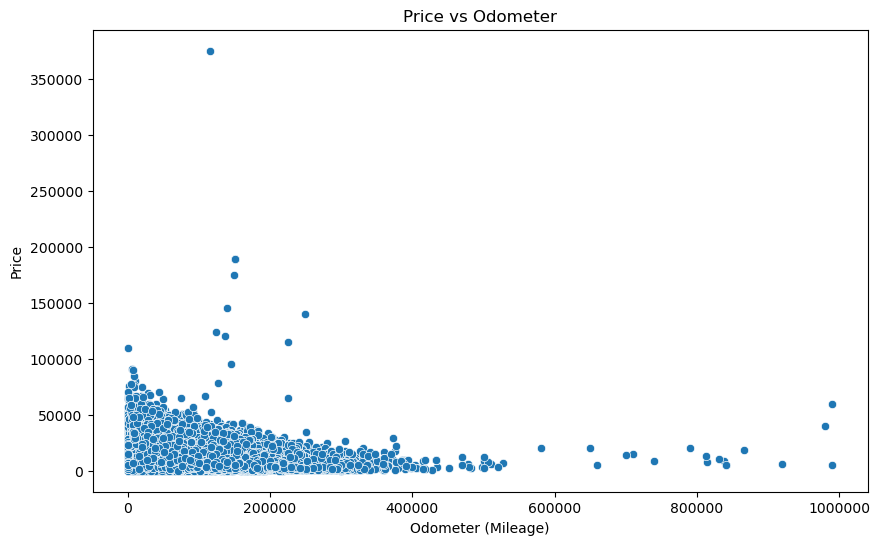

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='odometer', y='price', data=cars)
plt.title('Price vs Odometer')
plt.xlabel('Odometer (Mileage)')
plt.ylabel('Price')

plt.ticklabel_format(style='plain', axis='x')

plt.show()

Our examination of the vehicle sales data yielded profound insights into the used car market's dynamics, highlighting the role of multiple factors in shaping car prices. We discovered a significant impact of a car's condition on its market value, with well-maintained cars fetching higher prices. This is especially true for newer vehicles, which tend to be pricier, and for 'salvage' vehicles, which are often more affordable.

A notable observation was the preponderance of outliers, mainly cars in 'good' or 'like new' condition. This suggests a higher incidence of rare or high-end brands within these categories. Moreover, there was a distinct connection between a car's mileage and its selling price. Cars with lower mileage typically command higher prices, underscoring the importance of mileage in determining a car's worth.

These insights are extremely valuable for participants in the car industry, aiding in strategic planning and enabling buyers to make more educated decisions. Nonetheless, there is still room for further investigation. Future research could include forecasting car prices and examining specific car segments in greater detail, potentially offering a more intricate understanding of the used car market.
